In [1]:
#RRT Star Ideas explained: https://www.youtube.com/watch?v=_aqwJBx2NFk
#Fixed Step Size: https://www.youtube.com/watch?v=Ob3BIJkQJEw

# Function for line segment intersection taken from: 
# https://www.geeksforgeeks.org/check-if-two-given-line-segments-intersect/
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
# Given three collinear points p, q, r, the function checks if
# point q lies on line segment 'pr'
def onSegment(p, q, r):
    if ( (q.x <= max(p.x, r.x)) and (q.x >= min(p.x, r.x)) and
           (q.y <= max(p.y, r.y)) and (q.y >= min(p.y, r.y))):
        return True
    return False
 
def orientation(p, q, r):
    # to find the orientation of an ordered triplet (p,q,r)
    # function returns the following values:
    # 0 : Collinear points
    # 1 : Clockwise points
    # 2 : Counterclockwise
     
    # See https://www.geeksforgeeks.org/orientation-3-ordered-points/amp/
    # for details of below formula.
     
    val = (float(q.y - p.y) * (r.x - q.x)) - (float(q.x - p.x) * (r.y - q.y))
    if (val > 0):
         
        # Clockwise orientation
        return 1
    elif (val < 0):
         
        # Counterclockwise orientation
        return 2
    else:
         
        # Collinear orientation
        return 0

# The main function that returns true if
# the line segment 'p1q1' and 'p2q2' intersect.
def doIntersect(p1,q1,p2,q2):
     
    # Find the 4 orientations required for
    # the general and special cases
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)
 
    # General case
    if ((o1 != o2) and (o3 != o4)):
        return True
 
    # Special Cases
 
    # p1 , q1 and p2 are collinear and p2 lies on segment p1q1
    if ((o1 == 0) and onSegment(p1, p2, q1)):
        return True
 
    # p1 , q1 and q2 are collinear and q2 lies on segment p1q1
    if ((o2 == 0) and onSegment(p1, q2, q1)):
        return True
 
    # p2 , q2 and p1 are collinear and p1 lies on segment p2q2
    if ((o3 == 0) and onSegment(p2, p1, q2)):
        return True
 
    # p2 , q2 and q1 are collinear and q1 lies on segment p2q2
    if ((o4 == 0) and onSegment(p2, q1, q2)):
        return True
 
    # If none of the cases
    return False

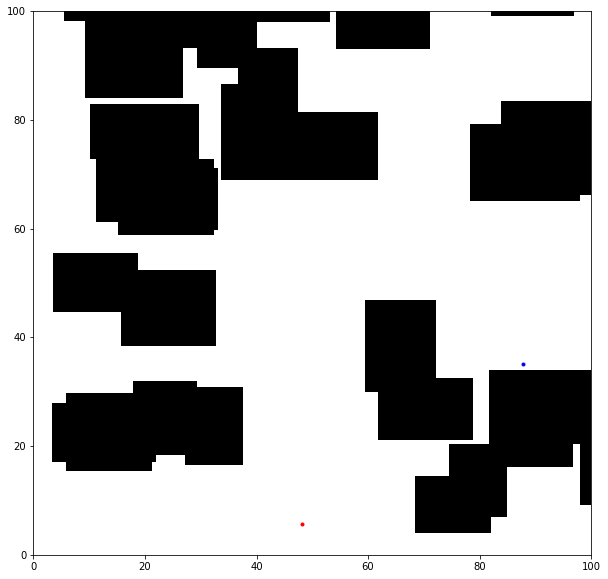

(120, 4)


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#width is the x-dimension, height is the y-dimension of the space of the env for the robot
width = 100
height = 100

num_obstacles = 30
obstacle_min_width = 10
obstacle_max_width = 20
obstacle_min_height = 10
obstacle_max_height = 20

# we are storing x, y, width, height of the obstacles in this array
# x and y are the bottom left corner
obstacles = np.random.rand(num_obstacles,4)

obstacles[:,0] = obstacles[:,0] *  width
obstacles[:,1] = obstacles[:,1] *  height
obstacles[:,2] = obstacle_min_width + obstacles[:,2] *  (obstacle_max_width - obstacle_min_width)
obstacles[:,3] = obstacle_min_height + obstacles[:,3] *  (obstacle_max_height - obstacle_min_height)

#print(obstacles)

# when defining the start and end points, we need to check whether they are inside an obstacle
def point_within_obstacle(point,obstacle):
    if point[0] > obstacle[0] and point[0] < obstacle[0] + obstacle[3] and point[1] > obstacle[1] and point[1] < obstacle[1] + obstacle[3]:
        return True
    else:
        return False

# checking to ensure start point is not within obstacle
while True:
    start_point = np.random.rand(2)
    start_point[0] = start_point[0] * width
    start_point[1] = start_point[1] * height
    
    within_obstacle_list = []
    
    for i in range(num_obstacles):
        within_obstacle_list.append(not point_within_obstacle(start_point,obstacles[i]))
    
    if all(within_obstacle_list):
        break

# checking to ensure end point is not within obstacle
while True:
    end_point = np.random.rand(2)
    end_point[0] = end_point[0] * width
    end_point[1] = end_point[1] * height
    
    within_obstacle_list = []
    
    for i in range(num_obstacles):
        within_obstacle_list.append(not point_within_obstacle(end_point,obstacles[i]))
    
    if all(within_obstacle_list):
        break

#print(start_point)
#print(end_point)

# plotting for visualisation
# obstacles are black
# start point is green
# end point is red

fig, ax = plt.subplots(1,figsize=(10,10))

for i in range(num_obstacles):
    rect = patches.Rectangle((obstacles[i,0],obstacles[i,1]), obstacles[i,2], obstacles[i,3], linewidth=1, facecolor='black')
    ax.add_patch(rect)

plt.plot(start_point[0], start_point[1], 'bo', markersize=3)
plt.plot(end_point[0], end_point[1], 'ro', markersize=3)
    
ax.set_xlim(0,100)
ax.set_ylim(0,100)
plt.show()

#start = Point(start_point[0], start_point[1])
#end = Point(end_point[0], end_point[1])

#Packing the obstacles into line segments
obstacle_segments = np.empty((0,4))

for i in range(len(obstacles)):
    
    point1 = np.array([obstacles[i][0],obstacles[i][1]])
    point2 = np.array([obstacles[i][0]+obstacles[i][2],obstacles[i][1]])
    point3 = np.array([obstacles[i][0],obstacles[i][1]+obstacles[i][3]])
    point4 = np.array([obstacles[i][0]+obstacles[i][2],obstacles[i][1]+obstacles[i][3]])
    
    set1 = np.hstack([point1,point3])
    set2 = np.hstack([point2,point4])
    set3 = np.hstack([point1,point2])
    set4 = np.hstack([point3,point4])
    
    obstacle_segments = np.vstack([obstacle_segments,set1,set2,set3,set4])

print(obstacle_segments.shape)

In [71]:
# we do not use the sqrt when calculating the distance to save on computation
# a step size of 25 is acutally 5 units long
step_size = 9

#when we are closer than threshold to the end point, we consider that we have reached
threshold = 1

#the neighbourhood is the area where we consider the RRT Star reconfiguration of the tree
neighbourhood = 36

#number of nodes to add after we have reached the goal to continue to refine the path
refinement_steps_required = 5000

#we use a np array to store all the node coordinates to enable vectorisation for calculation of distances
node_coordinates = np.array([start_point])
#print("Start Point: " + str(start_point))

#init the cost and parent arrays
cost = np.array([0])
parent = np.array([None])

refinement_bool=False

while True:
        
    #finding a random point within the play field
    new_point = np.array([[np.random.rand()*width,np.random.rand()*height]])
    #print("New Point: " + str(new_point))
    
    #calculate distance from new_point to the coordinates of all the nodes
    dist = (node_coordinates[:,0] - new_point[0,0])**2 + (node_coordinates[:,1] - new_point[0,1])**2 
    
    #use argmin to find the closest node
    nearest_node_idx = np.argmin(dist)
    nearest_node_coord = node_coordinates[nearest_node_idx,:].reshape(1,-1)
    #print("Nearest Node Coordinates: " + str(nearest_node_coord))
    
    vector = new_point - nearest_node_coord
    #print("Vector: " + str(vector))
    vector_magnitude = vector[0,0]**2 + vector[0,1]**2
    
    #overwrite the new point with the point in the direction by step size away
    #sqrt is needed because we did not calculate the sqrt when calculating the distances
    new_point = nearest_node_coord + np.sqrt(step_size / vector_magnitude) * vector
    #print("New Point: " + str(new_point))
    
    # update dist because we have shifted the new_point to step_size away from closest node
    dist = (node_coordinates[:,0] - new_point[0,0])**2 + (node_coordinates[:,1] - new_point[0,1])**2 
    
    # get indices for dist lower than the neighbourhood threshold
    neighbourhood_index = np.where(dist<neighbourhood)[0]
    #print("neighbourhood idx: " + str(neighbourhood_index))
    #print("neighbourhood index len: " +str(neighbourhood_index.shape))
    #print(" ")
    
    #update the dist matrix to only reflect those in the neighbourhood
    dist = dist[neighbourhood_index]
    
    # find the parent with the lowest cost
    cost_neighbourhood = cost[neighbourhood_index]
    neighbourhood_parent_idx = np.argmin(cost_neighbourhood)
    new_point_parent_idx = neighbourhood_index[neighbourhood_parent_idx]
    
    parent_coordinates = node_coordinates[new_point_parent_idx,:]
    
    #print("NC Shape: " +str(node_coordinates.shape))
    #print("OS Shape: " +str(obstacle_segments.shape))
    #print("Parent Coordinates: " +str(parent_coordinates))
    #print("OS Type: " + str(type(obstacle_segments[0,:])))
    #print(obstacle_segments[0,:].reshape(1,-1))
    
    intersection_found = False
    
    #check no intersection with obstacles before adding to tree
    for i in range(len(obstacle_segments)):
        insersect_bool = doIntersect(Point(new_point[0,0],new_point[0,1]), Point(parent_coordinates[0],parent_coordinates[1]), Point(obstacle_segments[i,0],obstacle_segments[i,1]), Point(obstacle_segments[i,2],obstacle_segments[i,3]))
        
        if insersect_bool:
            intersection_found = True
            break
                   
    #only if there are no intersections we add the node to the tree
    if not intersection_found:
        cost_to_new_point = cost[new_point_parent_idx] + dist[neighbourhood_parent_idx]
        
        node_coordinates = np.vstack([node_coordinates,new_point])
        cost = np.hstack([cost,cost_to_new_point])
        parent = np.hstack([parent,new_point_parent_idx])
        
        # perform the RRT* update of the tree
        updated_cost_neighbourhood = dist + cost_to_new_point
        #print(cost_neighbourhood)
        #print(" ")
        potential_neighbourhood_update = np.where(updated_cost_neighbourhood<cost_neighbourhood)[0]
        #print(potential_neighbourhood_update)
        
        for j in range(len(potential_neighbourhood_update)):
            child_node_idx = neighbourhood_index[potential_neighbourhood_update[j]]
            child_coordinates = node_coordinates[new_point_parent_idx,:]
            
            intersection_found = False
            
            #check no intersection with obstacles before updating the tree
            for i in range(len(obstacle_segments)):
                insersect_bool = doIntersect(Point(new_point[0,0],new_point[0,1]), Point(child_coordinates[0],child_coordinates[1]), Point(obstacle_segments[i,0],obstacle_segments[i,1]), Point(obstacle_segments[i,2],obstacle_segments[i,3]))

                if insersect_bool:
                    intersection_found = True
                    break
            
            if not intersection_found:
                cost[child_node_idx]=updated_cost_neighbourhood[potential_neighbourhood_update[j]]
                parent[child_node_idx]=len(parent) - 1
            
        # stop the process if we are within the threshold of the end point
        if (new_point[0,0] - end_point[0])**2 + (new_point[0,1] - end_point[1]) ** 2 < threshold and refinement_bool == False:
            print("solution found")
            end_node = len(cost) - 1
            refinement_bool=True
        
        if refinement_bool == True and len(cost) - end_node > refinement_steps_required:
            break

print("completed")

solution found
completed


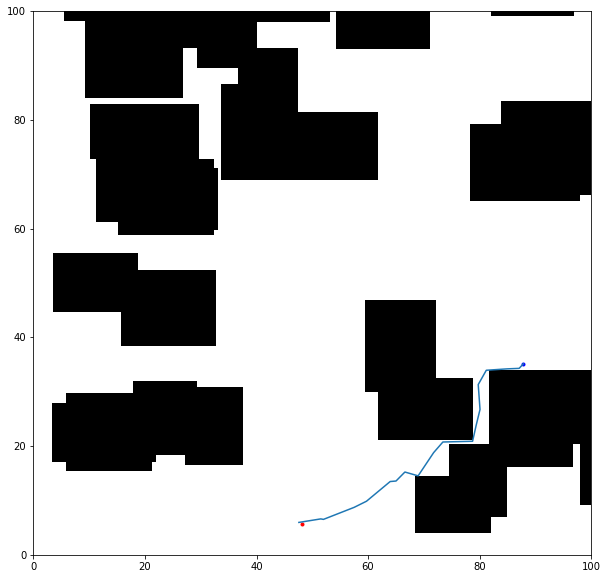

In [72]:
# Plotting the figure for the path
fig, ax = plt.subplots(1,figsize=(10,10))

for i in range(num_obstacles):
    rect = patches.Rectangle((obstacles[i,0],obstacles[i,1]), obstacles[i,2], obstacles[i,3], linewidth=1, facecolor='black')
    ax.add_patch(rect)

plt.plot(start_point[0], start_point[1], 'bo', markersize=3)
plt.plot(end_point[0], end_point[1], 'ro', markersize=3)

x=[]
y=[]

#start from the last node
node_idx = end_node

while True:
    x.append(node_coordinates[node_idx,0])
    y.append(node_coordinates[node_idx,1])
    
    if node_idx == 0:
        break
        
    node_idx = parent[node_idx]

plt.plot(x,y)
ax.set_xlim(0,100)
ax.set_ylim(0,100)
plt.show()